In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad

In [2]:
sc.settings.verbosity = 3            
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.2 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.13.0 python-igraph==0.9.8 pynndescent==0.5.5


In [3]:
# reading data

# biospsy tissue samples, endometrium
adata_ti = sc.read_h5ad(
            "/home/vfs/PycharmProjects/Organoids_sc_WS2122/data/Garcia_Alonso_tissue/GarciaAlsonso_tissue_subsampled.h5ad")

In [4]:
# unique feature names
adata_ti.var_names_make_unique()
# normalize
sc.pp.normalize_total(adata_ti, target_sum=1e4)
# logarithmize
sc.pp.log1p(adata_ti)

normalizing counts per cell
    finished (0:00:00)


In [3]:
# endometrial organoids, 1 donor 

adata_org = sc.read_h5ad(
            "/home/vfs/PycharmProjects/Organoids_sc_WS2122/data/Garcia_Alonso_tissue/GarciaAlsonso_organoid_subsampled.h5ad"
)

In [4]:
# unique feature names
adata_org.var_names_make_unique()
# normalize
sc.pp.normalize_total(adata_org, target_sum=1e4)
# logarithmize
sc.pp.log1p(adata_org)

normalizing counts per cell
    finished (0:00:01)


## Objective: Do endometerial organoid cell types resemble the tissue cell types? 

## Analysis steps:  
### Tissue
* sample clustering and check for merge possibility 
    - PCA plot
    - UMAP (all samples, sample wise coloring)
    - UMAP after samples -> check if mergeable
* merge samples
    - UMAP for confirmation again
* subsample for epithila cell types bc those are the once we expect in organoids too
* cluster/UMAP again

### Organoids 
* sample clustering and check for merge possibility 
    - PCA plot
    - UMAP (all samples, sample wise coloring)
    - UMAP after samples -> check if mergeable
* merge samples
    - UMAP for confirmation again

## Downstream analysis: 
* plot with proportion number of cells per cell type (?)
* correlation between increase of certain cell type in tissue and organoids

### Tissue: sample clustering and check for merge possibility

In [16]:
# PCA 
sc.tl.pca(adata_ti, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_ti, log=True)

computing PCA
    with n_comps=50


KeyboardInterrupt: 

The ellbow starts to flatten with 31 PCs. One could calculate more. However, the comparabily low detail of the celltype
labeling indicates that this is not necessary.

In [5]:
# UMAP all samples

sc.pp.neighbors(adata_ti, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata_ti)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:57)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:07)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


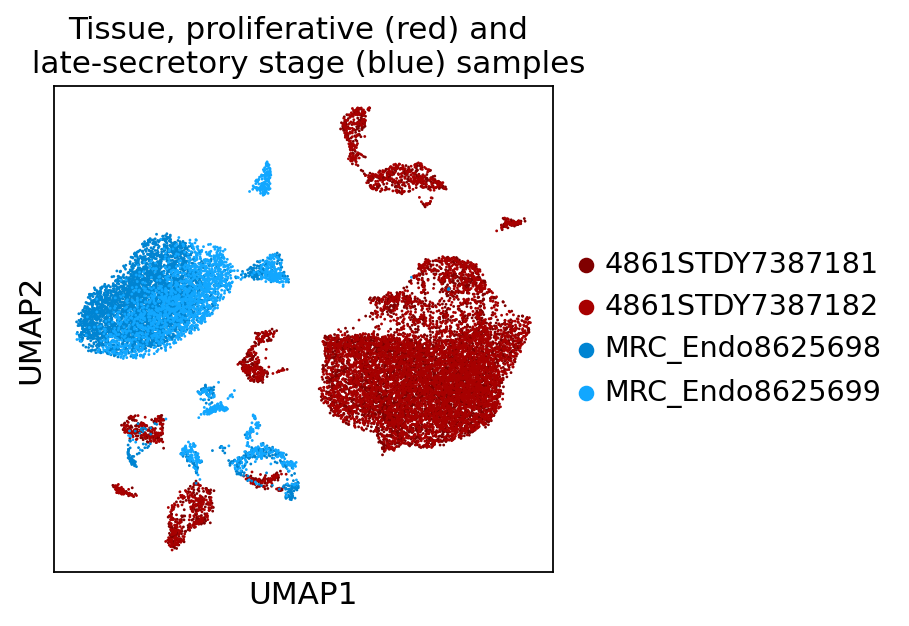

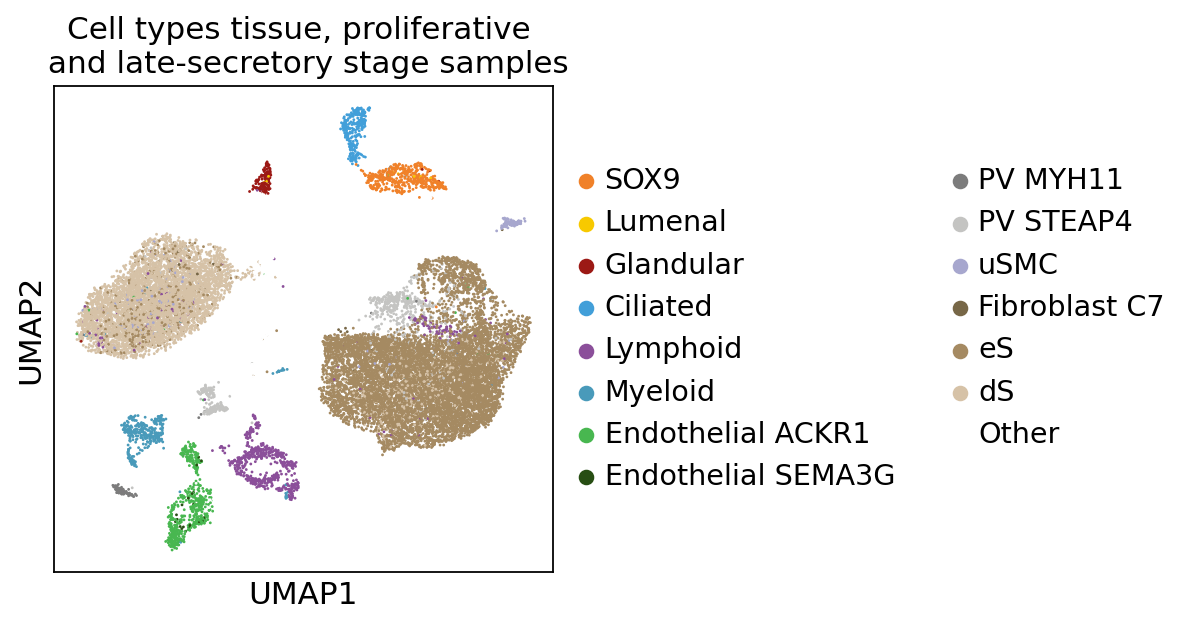

In [8]:
sc.pl.umap(adata_ti, color="SampleID", title="Tissue, proliferative (red) and \n late-secretory stage (blue) samples")
sc.pl.umap(adata_ti, color="Cell type", title="Cell types tissue, proliferative \n and late-secretory stage samples")


Those UMAPs indicate that the two samples from each state could be merged together. (Why? elaborate)

In [5]:
# enabel sample wise analysis
adata_ti_pro_1 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387181", :]  #pro sample 1
adata_ti_pro_2 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387182", :]  #pro sample 2
adata_ti_sec_1 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8625698", :]  #sec sample 1
adata_ti_sec_2 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8625699", :]  #sec sample 2

# merging both proliferating phase sample, and both secretory stage samples
adata_ti_merged_proliferative = ad.concat([adata_ti_pro_1,adata_ti_pro_2], join="outer")
adata_ti_merged_secretory = ad.concat([adata_ti_sec_1,adata_ti_sec_2], join="outer")

data_list_merged_ti = [adata_ti_merged_proliferative, adata_ti_merged_secretory]

NameError: name 'adata_ti' is not defined

In [11]:
# UMAP per men.cycle stage
for item in data_list_merged_ti:
    sc.pp.neighbors(item, n_neighbors=10, n_pcs=30)
    sc.tl.umap(item)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'SampleID' as categorical


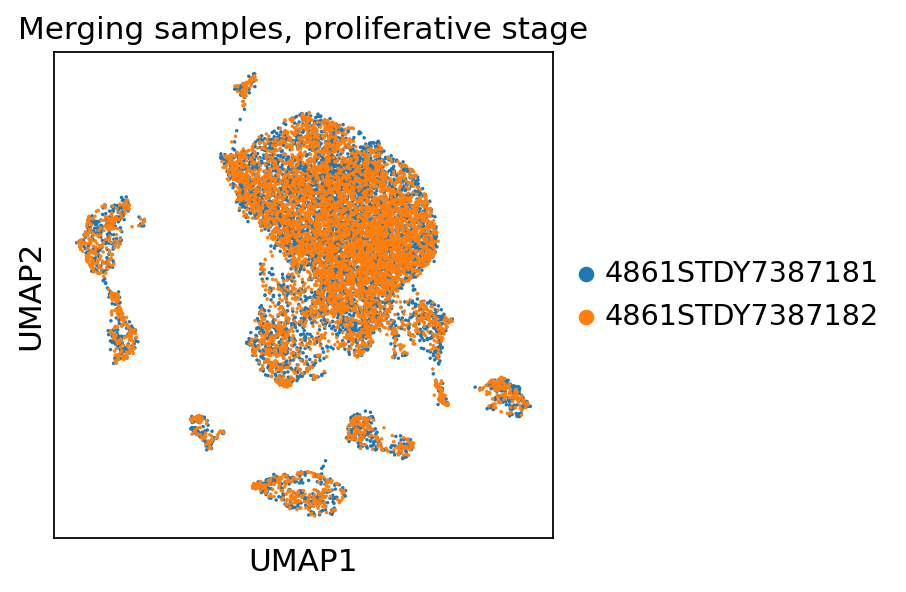

/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'SampleID' as categorical
/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Cell type' as categorical


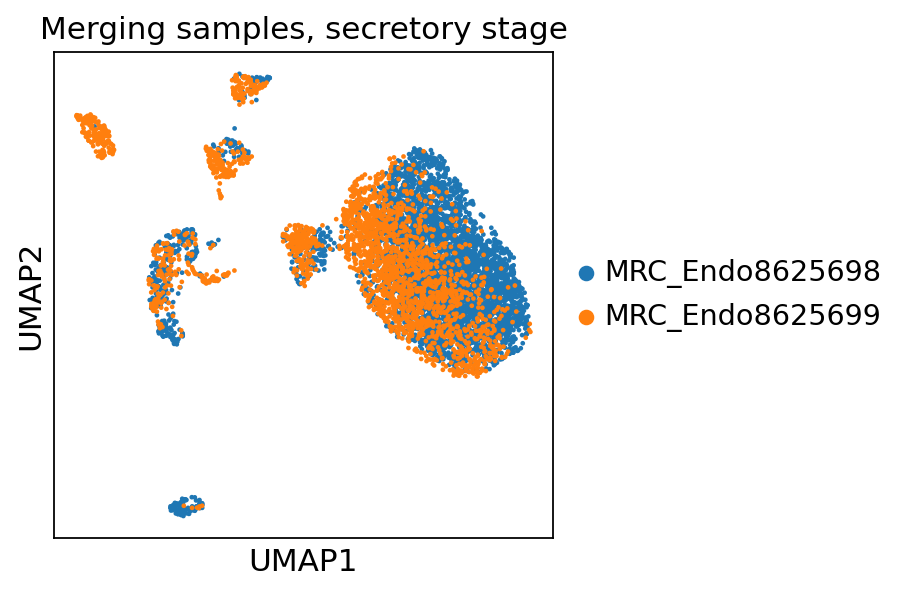

In [12]:
sc.pl.umap(adata_ti_merged_proliferative, color="SampleID", title = "Merging samples, proliferative stage" )
sc.pl.umap(adata_ti_merged_secretory, color="SampleID", title = "Merging samples, secretory stage")

the two samples cluster together very good. No data integration is needed.

Now we check for cell types similarities between the phases

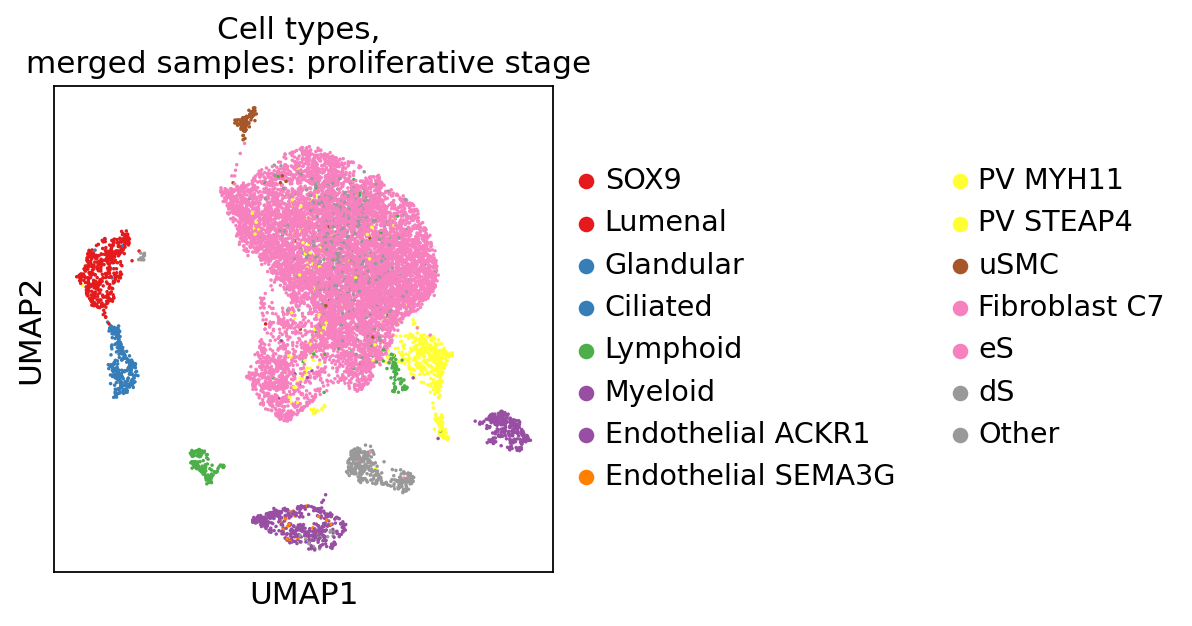

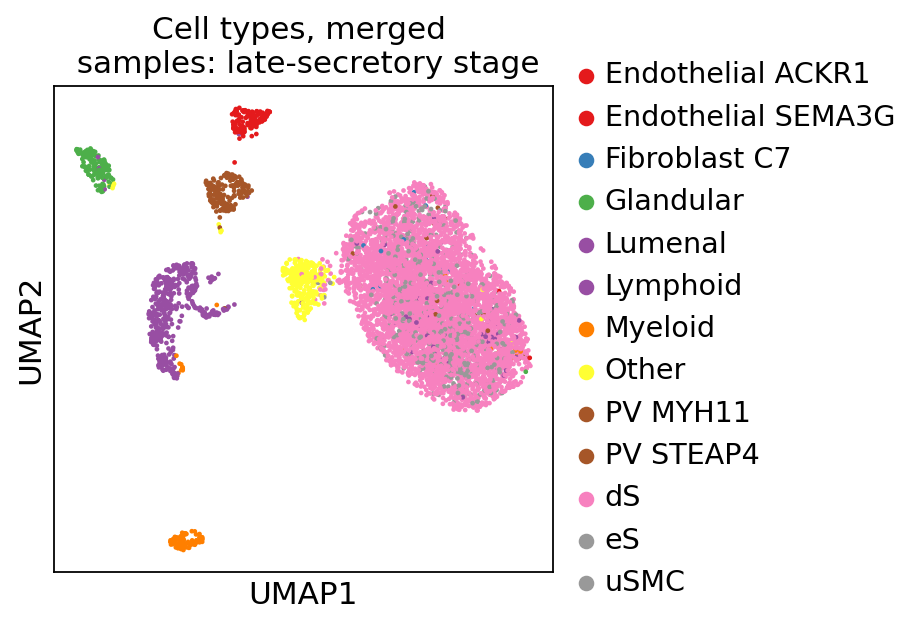

In [18]:
# UMAP for cell types
sc.pl.umap(adata_ti_merged_proliferative, color="Cell type", title = "Cell types, \n merged samples: proliferative stage")
sc.pl.umap(adata_ti_merged_secretory, color="Cell type", title = "Cell types, merged \n samples: late-secretory stage")
# TODO force color on cell type, for comparability of both plots

Since in organoids we will only expect epithelia cell types we subsample the tissue samples for epithila cell types
only too. Taken from [the paper](link to mapping paper) the epithelia cell types are:  Lumen, Gland, SOX9, Cilia

In [26]:
adata_ti.obs

,SampleID,log2p1_count,percent_mito,n_genes,DonorID,BiopsyType,Location,Binary Stage,Stage,Broad cell type,Cell type,CellCycle Phase
4861STDY7387181_AAACCTGAGGCATGGT,4861STDY7387181,13.951467,0.057320,3842,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,S
4861STDY7387181_AAACCTGAGGGCACTA,4861STDY7387181,13.776227,0.043838,3544,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1
4861STDY7387181_AAACCTGAGTGAAGTT,4861STDY7387181,12.894628,0.070791,2507,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Supporting,PV STEAP4,G1
4861STDY7387181_AAACCTGAGTGGGCTA,4861STDY7387181,12.329235,0.071137,1928,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,dS,G1
4861STDY7387181_AAACCTGCACCGAAAG,4861STDY7387181,12.171176,0.063977,1824,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
MRC_Endo8625699_TTTGGAGGTAACGATA,MRC_Endo8625699,12.696532,0.005876,1784,E1,Superficial_Biopsy,endometrium_biopsy,Secretory,late-secretory,Excluded,Other,G1
MRC_Endo8625699_TTTGGTTAGATACCAA,MRC_Endo8625699,13.761448,0.092179,3166,E1,Superficial_Biopsy,endometrium_biopsy,Secretory,late-secretory,Stromal,dS,G1
MRC_Endo8625699_TTTGGTTAGCATATGA,MRC_Endo8625699,14.286557,0.074063,4024,E1,Superficial_Biopsy,endometrium_biopsy,Secretory,late-secretory,Stromal,dS,G1
MRC_Endo8625699_TTTGGTTAGTATGGAT,MRC_Endo8625699,13.192447,0.133440,2809,E1,Superficial_Biopsy,endometrium_biopsy,Secretory,late-secretory,Stromal,eS,G1


In [ ]:
# subsampling tissue for epithelia cells
adata_ti

In order to get a feeling if the amount of cells of certain cell types have changed across the cycle we analysed
proportional changes of cell counts per cell type between both states.

1. get total cell number per sample (tissue-prolif, tissue-secre, organoid-cntlr, organoid-E2 treated)
2. get cell number per cell type
3. get proportion per cell type
4. indicate increase or decrease over time

In [30]:
adata_org_cntrl_0 = adata_org[adata_org.obs["sample_names"] == "WSSS_END9397520",:] # cntrl, day0

adata_org_cntrl_0.obs.columns
list = adata_org_cntrl_0.obs["Celltype_without_inhibitors"].cat.categories.tolist()
print(list)
type(list)
type(adata_org_cntrl_0)

['NH_Day0', 'NH_Proliferative', 'NH_Day2', 'NH_Day6', 'Pre-ciliated', 'Ciliated', 'Secretory', 'Inflamatory']


anndata._core.anndata.AnnData

In [ ]:
adata_org_merged_cntrl = ad.concat([adata_org_cntrl_0, 
                                   adata_org_cntrl_2, 
                                   adata_org_cntrl_6], join="inner")

In [11]:
print(type(adata_org_cntrl_0.obs["Celltype_without_inhibitors"]))
adata_org_merged_cntrl.obs["Celltype_without_inhibitors"].dtype

<class 'pandas.core.series.Series'>


dtype('O')

In [16]:
lst = adata_org_merged_cntrl.obs["Celltype_without_inhibitors"].drop_duplicates().tolist() # no idea why the usual .cat.categories doesn't work on the merged objects
lst

['NH_Day0',
 'Inflamatory',
 'NH_Day6',
 'NH_Day2',
 'NH_Proliferative',
 'Pre-ciliated',
 'Ciliated',
 'Secretory',
 'Low QC',
 'Estrogen Induced',
 'Secretory_Proliferative']

In [19]:
# some pandas magic to get the required numbers and values 
cell_counts_per_sample = []

# get the total number of cells per merge group
for item in data_list_merged_ti:
    cell_counts_per_sample.append() = len(item)

SyntaxError: cannot assign to function call (1019819766.py, line 5)

In [ ]:
# get proportions of cell types per sample

# get list of cell types
celltypes = item.obs["Celltype_without_inhibitors"].drop_duplicates().tolist() # no idea why the usual .cat.categories doesn't work on the merged objects
for celltype in celltypes:
        

computing PCA
    with n_comps=50
    finished (0:01:15)


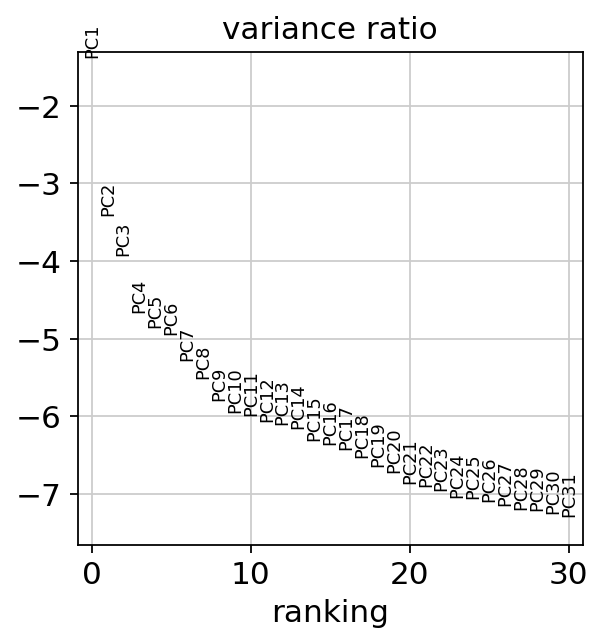

In [4]:
# PCA 
sc.tl.pca(adata_org, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_org, log=True)

same as for tissue: The ellbow starts to flatten with 31 PCs. One could calculate more. However, the comparabily low detail of the celltype labeling indicates that this is not necessary.

In [6]:
# UMAP all samples

sc.pp.neighbors(adata_org, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata_org)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:01:27)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:37)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)


In [8]:
adata_org.obs

,demultiplexed,sample_names,log2p1_count,percent_mito,n_genes,Days,Hormones,Inhibitor,IsClonal,Celltype_without_inhibitors,Celltype,CellCycle Phase
WSSS_END9397520_AAACCCAAGTAGGAAG,U2,WSSS_END9397520,13.902563,0.131979,3837,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G2M
WSSS_END9397520_AAACCCACACAAGCTT,U2,WSSS_END9397520,13.438143,0.086592,3261,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G2M
WSSS_END9397520_AAACCCACACATGTTG,U1,WSSS_END9397520,13.585785,0.124614,3421,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G1
WSSS_END9397520_AAACCCACACTCAAGT,U1,WSSS_END9397520,12.751125,0.095314,2488,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G1
WSSS_END9397520_AAACCCAGTCGCACAC,U1,WSSS_END9397520,13.382354,0.127189,3137,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
WSSS_END9397533_TTTGTTGCACAGCCAC,U2,WSSS_END9397533,12.576013,0.161835,1717,6,E+P,Ctrl,False,Secretory,Secretory_Ctrl,G1
WSSS_END9397533_TTTGTTGCAGGTTCAT,B44,WSSS_END9397533,13.092262,0.077760,2635,6,E+P,Ctrl,False,Secretory,Secretory_Ctrl,G1
WSSS_END9397533_TTTGTTGCAGTAGAAT,B44,WSSS_END9397533,13.100990,0.110871,2759,6,E+P,Ctrl,False,Ciliated,Ciliated,G1
WSSS_END9397533_TTTGTTGTCCATAAGC,U2,WSSS_END9397533,11.893681,0.082808,1205,6,E+P,Ctrl,False,Secretory,Secretory_Ctrl,G1


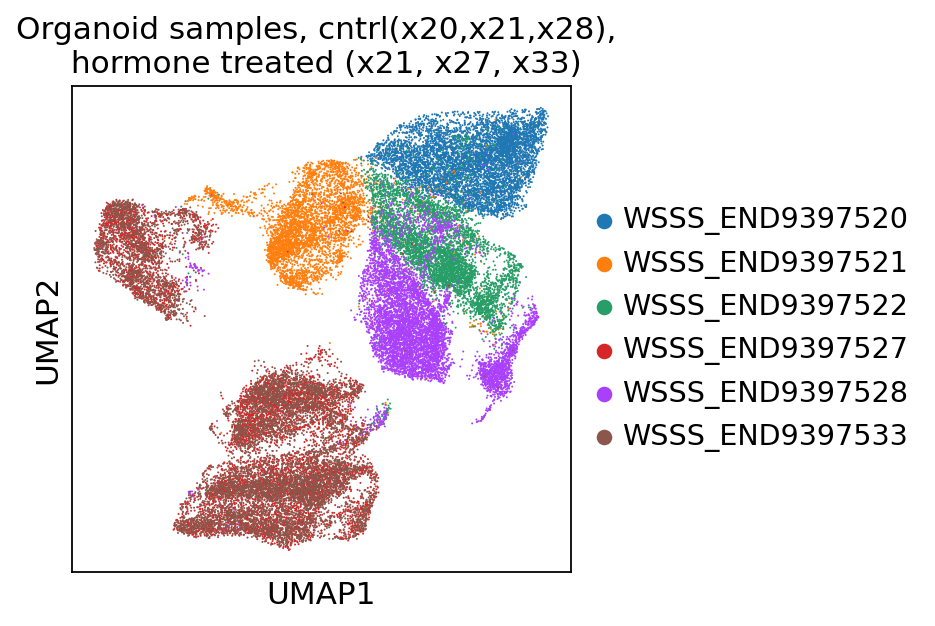

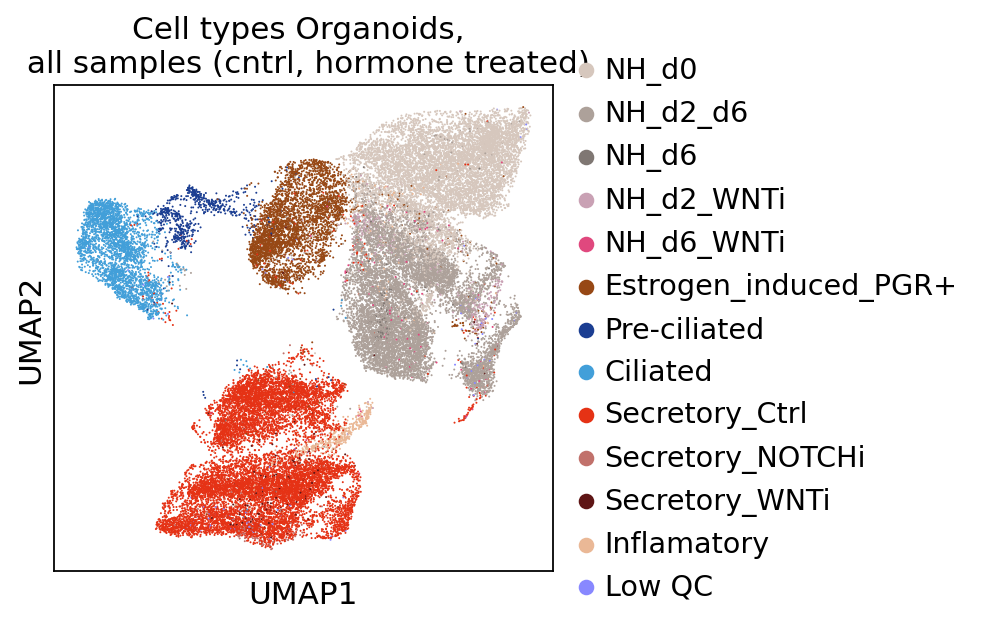

In [13]:
sc.pl.umap(adata_org, color="sample_names", title="Organoid samples, cntrl(x20,x21,x28), \n "
                                                  "hormone treated (x21, x27, x33)")
sc.pl.umap(adata_org, color="Celltype", title="Cell types Organoids, \n all samples (cntrl, hormone treated)")

In [17]:
help(sc.pl.umap)

Help on function umap in module scanpy.plotting._tools.scatterplots:

umap(adata: anndata._core.anndata.AnnData, *, color: Union[str, Sequence[str], NoneType] = None, gene_symbols: Union[str, NoneType] = None, use_raw: Union[bool, NoneType] = None, sort_order: bool = True, edges: bool = False, edges_width: float = 0.1, edges_color: Union[str, Sequence[float], Sequence[str]] = 'grey', neighbors_key: Union[str, NoneType] = None, arrows: bool = False, arrows_kwds: Union[Mapping[str, Any], NoneType] = None, groups: Union[str, NoneType] = None, components: Union[str, Sequence[str]] = None, layer: Union[str, NoneType] = None, projection: Literal['2d', '3d'] = '2d', scale_factor: Union[float, NoneType] = None, color_map: Union[matplotlib.colors.Colormap, str, NoneType] = None, cmap: Union[matplotlib.colors.Colormap, str, NoneType] = None, palette: Union[str, Sequence[str], cycler.Cycler, NoneType] = None, na_color: Union[str, Tuple[float, ...]] = 'lightgray', na_in_legend: bool = True, size: 

Those UMAPs indicate that there is a clear distiction between the three organoid groups:  
* untreated  
* treated with E2 only  
* treated with both E2 and P4  

Therefore samples for those three groups are getting merged. 

In [7]:
# controls
adata_org_cntrl_0 = adata_org[adata_org.obs["sample_names"] == "WSSS_END9397520",:] # cntrl, day0
adata_org_cntrl_2 = adata_org[adata_org.obs["sample_names"] == "WSSS_END9397522",:] #or sample 2 # day 6, comp: XAV939, no stim
adata_org_cntrl_6 = adata_org[adata_org.obs["sample_names"] == "WSSS_END9397528",:] #or sample 3 # day 6, no stim, no compound
# merging controls
adata_org_merged_cntrl = ad.concat([adata_org_cntrl_0, 
                                   adata_org_cntrl_2, 
                                   adata_org_cntrl_6], join="outer" )

# estrogen treated
adata_org_tx_E2_0 = adata_org[adata_org.obs["sample_names"] == "WSSS_END9397521",:] # E2, day 0

# estrogen and progesteron treated 
adata_org_tx_E2P4_2 = adata_org[adata_org.obs["sample_names"] == "WSSS_END9397527",:] # E2 + P4 day 2
adata_org_tx_E2P4_6 = adata_org[adata_org.obs["sample_names"] == "WSSS_END9397533",:] # E2 + P4, day 6
# merging E2P4 treated
adata_org_merged_E2P4 = ad.concat([adata_org_tx_E2P4_2, 
                                  adata_org_tx_E2P4_6], join="outer")

data_list_org_groups = [adata_org_merged_cntrl, 
                       adata_org_tx_E2_0,
                       adata_org_merged_E2P4]

In [8]:
# calculated UMAPs
for item in data_list_org_groups:
    sc.pp.neighbors(item, n_neighbors=10, n_pcs=30)
    sc.tl.umap(item)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


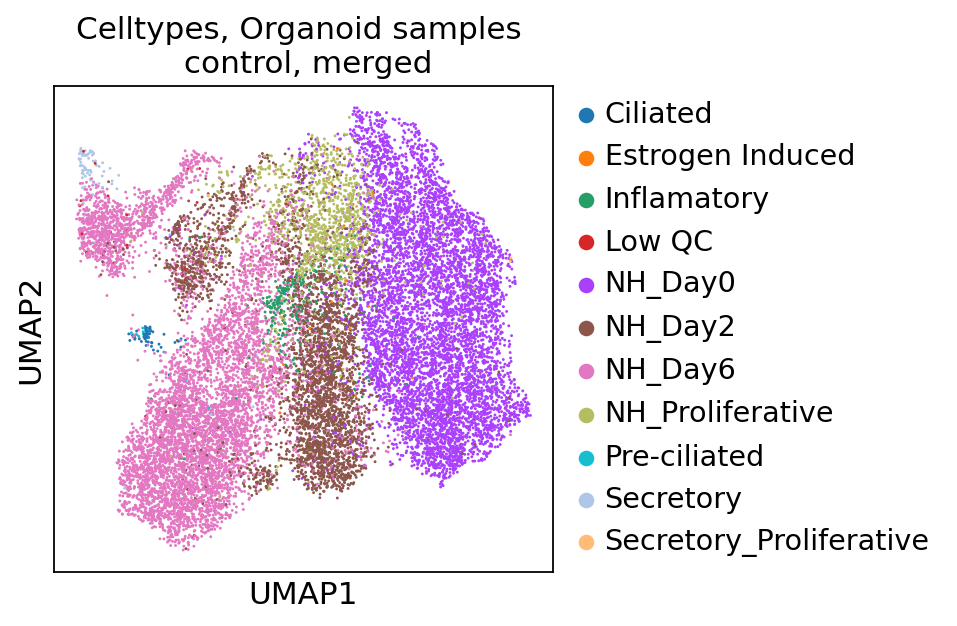

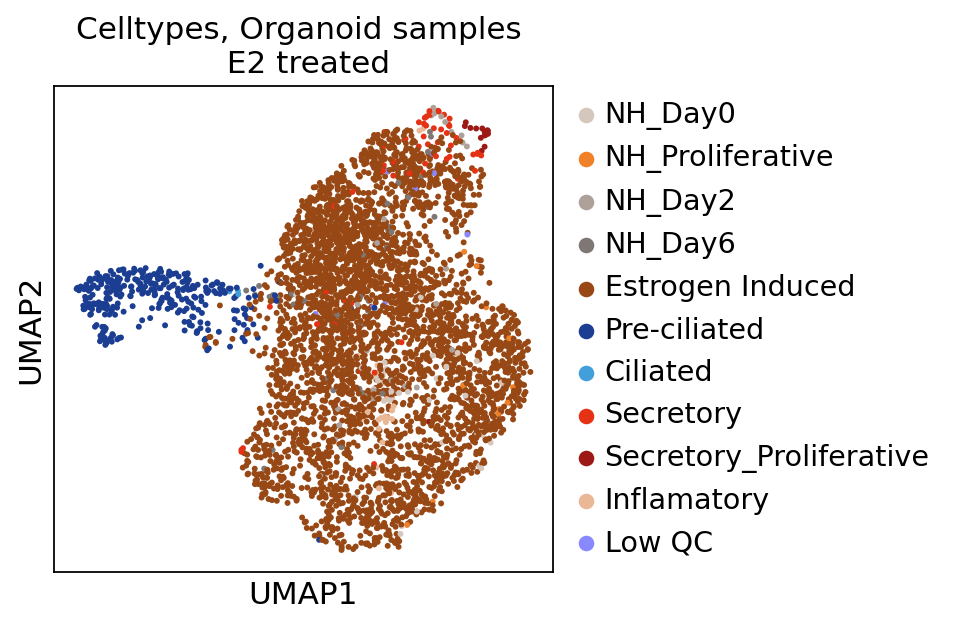

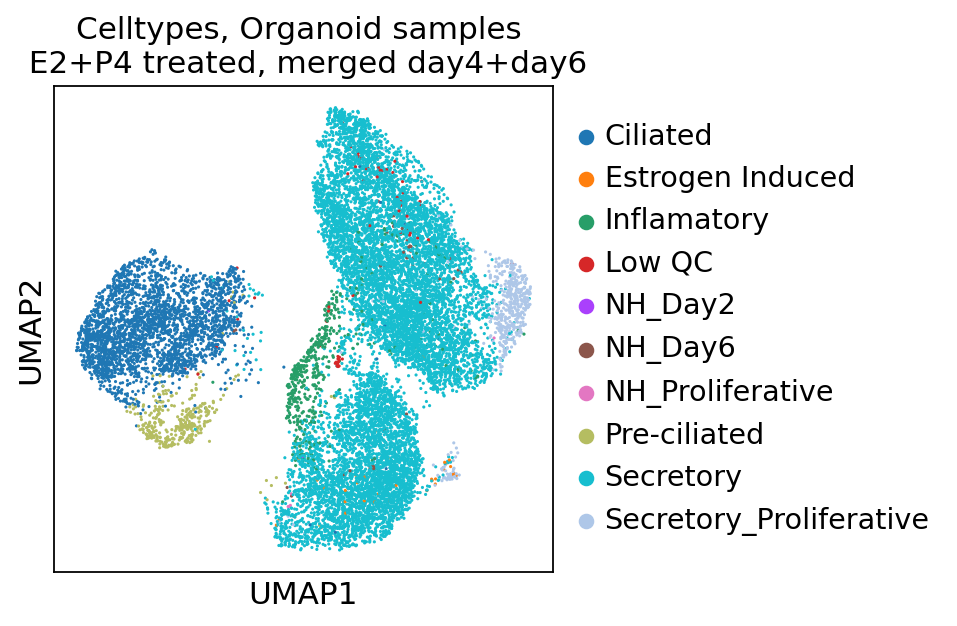

In [11]:
sc.pl.umap(adata_org_merged_cntrl, 
           color="Celltype_without_inhibitors", 
           title="Celltypes, Organoid samples \n control, merged")

sc.pl.umap(adata_org_tx_E2_0, 
           color="Celltype_without_inhibitors", 
           title="Celltypes, Organoid samples \n E2 treated")

sc.pl.umap(adata_org_merged_E2P4, 
           color="Celltype_without_inhibitors", 
           title="Celltypes, Organoid samples \n E2+P4 treated, merged day4+day6")


!! Statement over merging decision needed !! 

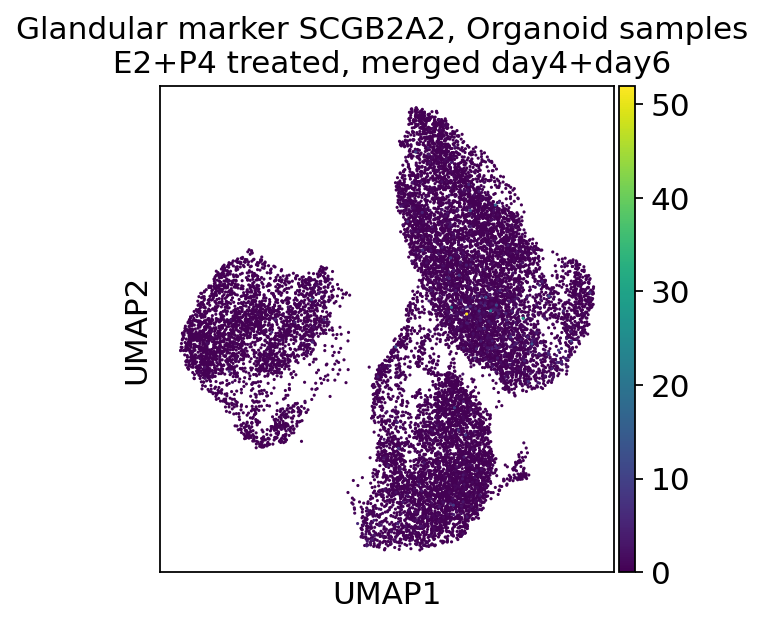

In [17]:
sc.pl.umap(adata_org_merged_E2P4, 
           color="SCGB2A2", 
           title="Glandular marker SCGB2A2, Organoid samples \n E2+P4 treated, merged day4+day6")

In order to get a feeling if the amount of cells of certain cell types have changed across the cycle we analysed
proportional changes of cell counts per cell type between both states.
1. get total cell number per sample (tissue-prolif, tissue-secre, organoid-cntlr, organoid-E2 treated)
2. get cell number per cell type
3. get proportion per cell type
4. indicate increase or decrease over time

## Comparision of propotional development of celltypes due to hormone influence in tissue and organoids

In [24]:
# WIP 

## Objective: Does the cycle state of the donor influence the organoid?

### Analysis steps: 
* looking for gene marker specific for proliferative phase (endothelia cells only)
    - Table with differentially expressed genes in tissue
* check for cycle-state specificity
    - heatmap comparing proliferative tissue & secretory tissue
    - heatmap scaled and normalized
* check for transferablilty to organoids (Day0  and Day6)
    - heatmap with prolif, secretory tissue + day0, day6 organoids
    - saled and normalized 

### Differential gene expression organoids 

In [8]:
for item in data_list_org_groups:    
    sc.tl.rank_genes_groups(item, 'Celltype_without_inhibitors', method='wilcoxon') 
    # TODO: it throws warings about not beeing logarithmized, idk where those come from, needs to be investigated further

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:32)
ranking genes


/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:22)


In [9]:
for item in data_list_org_groups:
    #show the 10 top ranked genes per cluster in a dataframe:
    print(pd.DataFrame(item.uns['rank_genes_groups']['names']).head(10))

   Ciliated Estrogen Induced Inflamatory  Low QC NH_Day0 NH_Day2  NH_Day6  \
0     TPPP3            UQCC2       KRT23    MT1E  RPL13A    NACA       CP   
1  C20orf85           MT-ND6     S100A11    MT1H    MMP7  MT-CO3     TFF3   
2     ODF3B            PRDX1       ITGB8    MT1G  NAP1L1  MT-ND1     SLPI   
3   C5orf49           NDUFS5       ANXA2    MT2A   RPL23    RPL3     IGF2   
4   FAM183A            NR2F2       KRT19    MT1X   RPS20   PPDPF     AGR3   
5      CAPS           SNRPD1        IL32    MT1M   RPS17   ITM2C    MUC5B   
6    IGFBP7           TUBA1B       MUC16    MT1F   RPS11   RPL15     LCN2   
7     RSPH1            NUDT1     TACSTD2    TFF3   FBLN1   RPL19  SLC40A1   
8   C9orf24            CPSF6    SH3BGRL3    BST2   COTL1    CYBA  SLC34A2   
9     SMIM6            PSMA7   RAB11FIP1  S100A6    RPSA    RPS7    WFDC2   

  NH_Proliferative Pre-ciliated Secretory Secretory_Proliferative  
0            HMGB2      C5orf49      TFF3                   UBE2C  
1         KIAA01